In [24]:
mapping = [
    'C','Db','D','Eb','E','F','F#','G','Ab','A','Bb','B',
    'C','C#','D','D#','E','F','Gb','G','G#','A','A#','B',
    'Am','Bbm','Bm','Cm','Dbm','Dm','Ebm','Em','Fm','F#m','Gm','Abm',
    'Am','C#m','Bm','Cm','C#m','Dm','D#m','Em','Fm','Gbm','Gm','G#m'
]

In [25]:
CIRCLE_OF_FIFTHS_MAJ = ['C', 'G', 'D', 'A', 'E', 'B', 'F#', 'Db', 'Ab', 'Eb', 'Bb', 'F']
CIRCLE_OF_FIFTHS_MIN = ['Am', 'Em', 'Bm', 'F#m', 'Dbm', 'Abm', 'Ebm', 'Bbm', 'Fm', 'Cm', 'Gm', 'Dm']

In [28]:
f_orig = './data/Complete Examples/Real Book/All Of Me.mid'
f_impro = './data/Complete Examples/Jazz-Midi/All Of Me.mid'

In [29]:
from standardize import standardize, get_tempo

s_o = standardize(f_orig)
s_i = standardize(f_impro)

bpmeasure_o = get_tempo(f_orig)
bpmeasure_i = get_tempo(f_impro)

a minor 0
a minor 0


In [30]:
from melody_alignment import find_chords

find_chords(s_o)
find_chords(s_i)

fluidsynth: warning: SDL2 not initialized, SDL2 audio driver won't be usable
fluidsynth: warning: SDL2 not initialized, SDL2 audio driver won't be usable
fluidsynth: warning: SDL2 not initialized, SDL2 audio driver won't be usable
fluidsynth: warning: SDL2 not initialized, SDL2 audio driver won't be usable
2022-01-17 21:01:53 Extracting feature
2022-01-17 21:01:56 Loading model
2022-01-17 21:01:56 Using built-in model /media/manu/Data/PycharmProjects/thesis/venv/lib/python3.8/site-packages/omnizart/checkpoints/chord/chord_v1 for transcription.


2022-01-17 21:02:08 Preparing feature for model prediction
INFO:Chord Application:Preparing feature for model prediction
2022-01-17 21:02:08 Predicting...
INFO:Chord Application:Predicting...
2022-01-17 21:02:11 Infering chords...
INFO:Chord Application:Infering chords...
2022-01-17 21:02:11 MIDI file has been written to ./data/chords/Real Book/All Of Me.mid.
INFO:Base Class:MIDI file has been written to ./data/chords/Real Book/All Of Me.mid.
2022-01-17 21:02:11 MIDI and CSV file have been written to /media/manu/Data/PycharmProjects/thesis/data/chords/Real Book
INFO:Chord Application:MIDI and CSV file have been written to /media/manu/Data/PycharmProjects/thesis/data/chords/Real Book
2022-01-17 21:02:11 Transcription finished
INFO:Chord Application:Transcription finished
fluidsynth: warning: SDL2 not initialized, SDL2 audio driver won't be usable
fluidsynth: warning: SDL2 not initialized, SDL2 audio driver won't be usable
fluidsynth: warning: SDL2 not initialized, SDL2 audio driver won'

2022-01-17 21:02:35 Preparing feature for model prediction
INFO:Chord Application:Preparing feature for model prediction
2022-01-17 21:02:35 Predicting...
INFO:Chord Application:Predicting...
2022-01-17 21:02:37 Infering chords...
INFO:Chord Application:Infering chords...
2022-01-17 21:02:37 MIDI file has been written to ./data/chords/Jazz-Midi/All Of Me.mid.
INFO:Base Class:MIDI file has been written to ./data/chords/Jazz-Midi/All Of Me.mid.
2022-01-17 21:02:37 MIDI and CSV file have been written to /media/manu/Data/PycharmProjects/thesis/data/chords/Jazz-Midi
INFO:Chord Application:MIDI and CSV file have been written to /media/manu/Data/PycharmProjects/thesis/data/chords/Jazz-Midi
2022-01-17 21:02:37 Transcription finished
INFO:Chord Application:Transcription finished


'./data/chords/Jazz-Midi/All Of Me.mid'

In [31]:
import importlib
import numpy as np
import music21
import pandas as pd
import seaborn as sns
from mingus.core import chords
from chord_extractor.extractors import Chordino
import melody_alignment

importlib.reload(melody_alignment)
importlib.reload(np)

<module 'numpy' from '/media/manu/Data/PycharmProjects/thesis/venv/lib/python3.8/site-packages/numpy/__init__.py'>

In [32]:
orig = pd.read_csv('./data/chords/Real Book/All Of Me.csv')
impro = pd.read_csv('./data/chords/Jazz-Midi/All Of Me.csv')

In [33]:
orig['chord'] = orig['chord'].str.replace(":maj", "")
orig['chord'] = orig['chord'].str.replace(":min", "m")
impro['chord'] = impro['chord'].str.replace(":maj", "")
impro['chord'] = impro['chord'].str.replace(":min", "m")

In [8]:
# orig_start = orig['start'].iloc[0].copy()
# impro_start = impro['start'].iloc[0].copy()

# orig['start'] = orig['start'] - orig_start
# orig['end'] = orig['end'] - orig_start
# impro['start'] = impro['start'] - impro_start
# impro['end'] = impro['end'] - impro_start

In [34]:
orig['start']*=bpmeasure_o
orig['end']*=bpmeasure_o
impro['start']*=bpmeasure_i
impro['end']*=bpmeasure_i

In [36]:
print(orig.head())
print(impro.head())

  chord      start        end
0     C   9.210591  10.835990
1    Em  10.944349  12.027948
2    Em  12.136308  13.653347
3    Em  13.761707  16.253984
4     C  16.362344  18.637902
  chord      start        end
0    Dm  12.678108  15.193605
1     B  15.294225  17.306623
2    Am  17.608483  18.514062
3    G#  18.614682  20.325220
4    Gm  20.425840  21.733899


In [49]:
a = pd.DataFrame(columns=['orig', 'impro'])

for i in range(int(np.max([orig['start'].max(), impro['start'].max()]))+1):
    orig_c = orig[
        (orig['start'] <= i) &
        (i <= orig['end'])
    ]
    impro_c = impro[
        (impro['start'] <= i) &
        (i <= impro['end'])
    ]
    
    if orig_c.shape[0] > 0:
        a.loc[i, 'orig'] = orig_c.iloc[0, 0]
    else:
        a.loc[i, 'orig'] = np.nan
        
    if impro_c.shape[0] > 0:
        a.loc[i, 'impro'] = impro_c.iloc[0, 0]
    else:
        a.loc[i, 'impro'] = np.nan

In [50]:
tot_scores = []
max_score = 0
best = None

for i in range(int(a.shape[0]/2)):
    scores = []
    for j in range(a.shape[0]):
        scores.append(melody_alignment.chord_score(a.loc[j, 'orig'], a.loc[j, 'impro']))
    
    if np.nanmean(scores) > max_score:
        best = a.copy()
        max_score = np.nanmean(scores)
    
    a['orig'] = a.orig.shift(1)
    
    tot_scores.append(np.nanmean(scores))

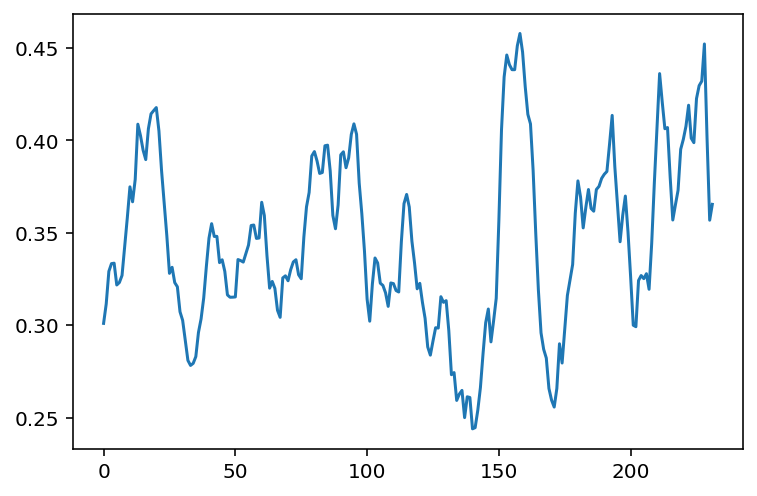

In [51]:
from matplotlib import pyplot as plt
plt.plot(tot_scores)

In [52]:
best.tail(100)

,orig,impro
365,Am,Dm
366,NaN,Dm
367,NaN,Dm
368,C,Dm
369,C,Dm
...,...,...
460,Fm,NaN
461,Fm,NaN
462,Fm,NaN
463,Fm,NaN


In [56]:
j = 20
print(sorted(range(len(tot_scores)), key=lambda i: tot_scores[i])[-j:])
print(sorted(tot_scores)[-j:])

[161, 18, 19, 20, 222, 212, 225, 160, 226, 227, 152, 211, 155, 156, 154, 153, 159, 157, 228, 158]
[0.4141025641025641, 0.4143552311435524, 0.4161172161172161, 0.4177777777777777, 0.419047619047619, 0.4206896551724137, 0.4226299694189602, 0.4291139240506328, 0.42962962962962964, 0.43207547169811317, 0.4343558282208589, 0.4361581920903954, 0.4382716049382716, 0.4382716049382716, 0.4409937888198758, 0.4462167689161554, 0.44779874213836474, 0.45115303983228505, 0.4522012578616352, 0.4578616352201258]


In [54]:
best

,orig,impro
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
460,Fm,NaN
461,Fm,NaN
462,Fm,NaN
463,Fm,NaN
